Hledání kořenů rovnice
Zadání: 
Vyhledávání hodnot, při kterých dosáhne zkoumaný signál vybrané hodnoty, je důležitou součástí analýzy časových řad. Pro tento účel existuje spousta zajímavých metod. Jeden typ metod se nazývá ohraničené (například metoda půlení intervalu), při kterých je zaručeno nalezení kořenu, avšak metody typicky konvergují pomalu. Druhý typ metod se nazývá neohraničené, které konvergují rychle, avšak svojí povahou nemusí nalézt řešení (metody využívající derivace). Vaším úkolem je vybrat tři různorodé funkce (například polynomiální, exponenciální, logaritmickou, harmonickou se směrnicí, aj.), které mají alespoň jeden kořen a nalézt ho jednou uzavřenou a jednou otevřenou metodou. Porovnejte časovou náročnost nalezení kořene a přesnost nalezení.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import math
import time

## Ohraničená metoda

Bisekce: metoda pro nalezení kořenů rovnice pomocí půlení intervalů
Vstupy: f       - funkce (lambda)
        a       - levý konec intervalu
        b       - pravý konec intervalu
        error   - délka požadovaného intervalu
Výstup: hodnota x (kořen)
Předpoklady, poznámky:
- funkce musí být 2D
- musí existovat kořen mezi koncovými body intervalu [a,b], jinak funkce nebude fungovat
- počítáme množství iterací, které jsou potřeba k dosažení požadované hodnoty (error), která je definovaná analytickým vzorcem "ln((b-a)/error) / ln(2) - 1"

In [2]:
def bisection(f, a, b, error):

    if(f(a)*f(b) >= 0):
        print("The interval defined by [" + a + ", " + b + "] has no roots!")
        return None
    

    N =  int (math.log((b-a)/error, math.e) / math.log(2, math.e) - 1)
    print(f"Počet iterací požadovaných pro přesnost {error} je {N}")
    mid_point = 0
    iter = 0
    start = time.perf_counter()
    for i in range(1, N+1):
        iter +=1
        mid_point = (a+b)/2
        f_m = f(mid_point)
        if(f(a)*f_m < 0):
            b = mid_point
        elif (f(b)*f_m < 0):
            a = mid_point
        elif (f_m == 0):
            end = time.perf_counter()
            print(f"Čas bisekce: {(end-start)}")
            return mid_point
        else:
            print("Metoda bisekce selhala!")
    end = time.perf_counter()
    print(f"Bisekce - počet iterací:{iter}")
    print(f"Bisekce - čas: {(end-start)}")
    x = (a+b)/2
    print(f"Bisekce - výsledek: x={x} f(x)={f(x)}")
    print()
    return x

## Neohraničená metoda

Newtonova metoda
Vstupy: f       - funkce
        d_f     - derivace funkce
        error   - požadovaná úroveň chyby/přesnosti
        x0      - počáteční bod x

Poznámky:
- Newtonova metoda je příkladem neohraničeného algoritmu pro hledání kořenů rovnice
- Je poměrně rychlá (rychlejší než ohraničené algoritmy), ale spoléhá se na počáteční hodnotu, tj. pokud není tato hodnota vybraná správně, metoda nemusí fungovat 

In [3]:
def NewtonMethod(f, d_f, error, x0):
    iter = 0
    start = time.perf_counter()
    while(abs(f(x0)) >= error):
        iter +=1
        x0 = x0 - (f(x0)/d_f(x0))
        if (d_f(x0) == 0):
            print("Nulová derivace, nelze pokračovat!")
            return None
    end = time.perf_counter()
    print(f"Newtonova metoda - počet iterací:{iter}")
    print(f"Newtonova metoda - čas: {(end-start)}")
    print(f"Newtonova metoda - výsledek: x={x0} f(x)={f(x0)}")
    print()
    return x0

## Generování funkcí a hledání jejich kořenů

### Polynomiální

Knihovna sym je nejprve použita k definování symbolické funkce a poté se konvertuje na skutečnou funkci, která přebírá hodnoty pomocí funkce sym.lambdify()

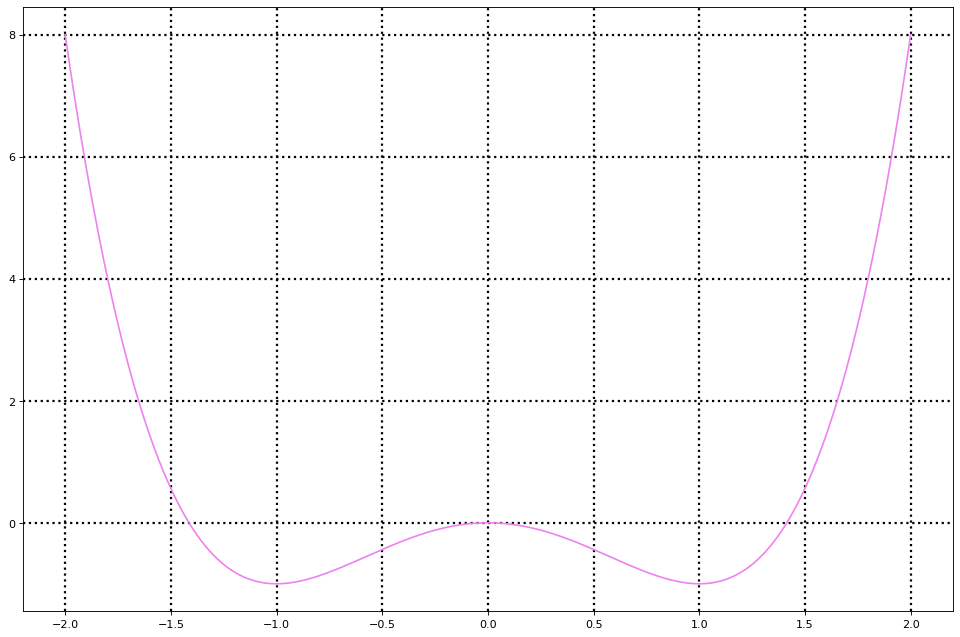

In [3]:
x = sym.Symbol('x')
f = x**4 - 2*x**2
df = sym.diff(f)
f = sym.lambdify(x, f)
df = sym.lambdify(x, df)

x = np.linspace(-2, 2, 200)
y = f(x)

plt.figure(figsize=(15, 10), dpi=80)
plt.rc('grid', linestyle=':', color='black', linewidth=2)
plt.plot(x, y, color='violet')
plt.grid(True)
plt.show()

In [5]:
root_bisection = bisection(f, -1.5, 1, 0.0001)
root_Newton = NewtonMethod(f, df, 0.0001, -1.5)

Počet iterací požadovaných pro přesnost 0.0001 je 13
Bisekce - počet iterací:13
Bisekce - čas: 3.550015389919281e-05
Bisekce - výsledek: x=-1.414093017578125 f(x)=-0.0006817590351131386

Newtonova metoda - počet iterací:3
Newtonova metoda - čas: 1.0400079190731049e-05
Newtonova metoda - výsledek: x=-1.4142136333868403 f(x)=4.0171445636616454e-07



#### Newtonova metoda - špatný odhad

In [6]:
#I špatný odhad v Newtonově metodě je rychlejší než bisekce
root_Newton = NewtonMethod(f, df, 0.0001, -3)
print(f"Newtonova metoda - výsledek: x={root_Newton} f(x)={f(root_Newton)}")

Newtonova metoda - počet iterací:6
Newtonova metoda - čas: 2.259993925690651e-05
Newtonova metoda - výsledek: x=-1.4142279881313702 f(x)=8.160649304311818e-05

Newtonova metoda - výsledek: x=-1.4142279881313702 f(x)=8.160649304311818e-05


### Exponenciální funkce

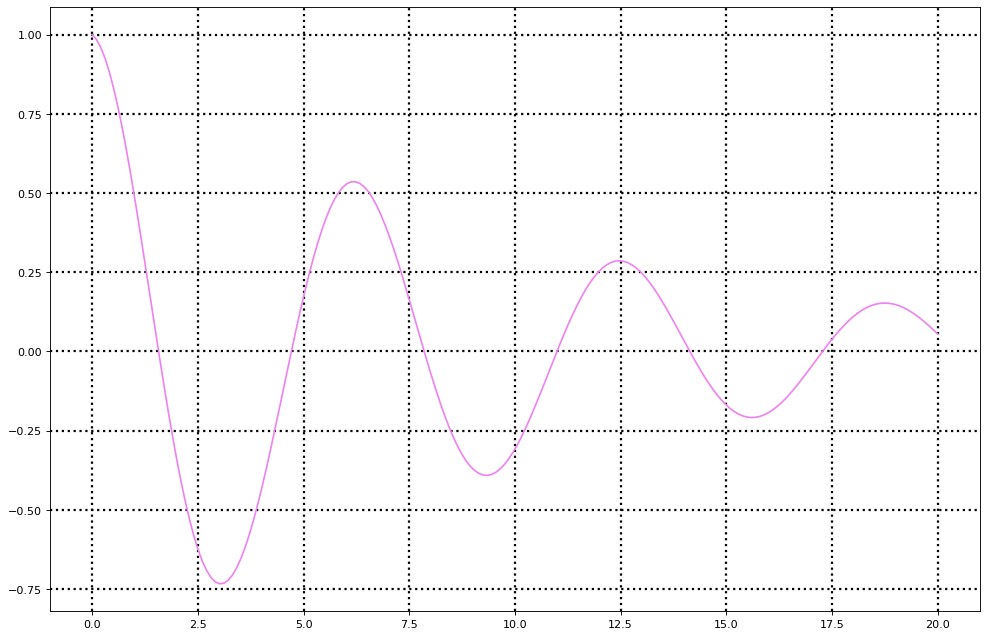

In [4]:
x = sym.Symbol('x')
f = sym.exp(-0.1*x)*sym.cos(x)
df = sym.diff(f)
f = sym.lambdify(x, f)
df = sym.lambdify(x, df)

x = np.linspace(0, 20, 200)
y = [f(x_) for x_ in x]

plt.figure(figsize=(15, 10), dpi=80)
plt.rc('grid', linestyle=':', color='black', linewidth=2)
plt.plot(x, y, color='violet')
plt.grid(True)
plt.show()

In [ ]:
root_bisection = bisection(f, 7.5, 10, 0.001)
root_Newton = NewtonMethod(f, df, 0.001, 7.5)

Number of iterations required for 0.001 accuracy is 10
Bisection num iterations:10
Bisection time: 4.980199992132839e-05
Bisection result: x=7.852783203125 f(x)=0.0005464756743810865

Newton method num iterations:5
Newton method time: 9.205700007441919e-05
Newton method result: x=14.138042318409733 f(x)=-0.0002129059636923221



### Citlivost Newtonovy metody na x0

In [9]:
root_Newton = NewtonMethod(f, df, 0.001, 6.6)
root_Newton = NewtonMethod(f, df, 0.001, 6.5)
root_Newton = NewtonMethod(f, df, 0.001, 6.4)
root_Newton = NewtonMethod(f, df, 0.001, 6.3)
root_Newton = NewtonMethod(f, df, 0.001, 6.2)

Newtonova metoda - počet iterací:7
Newtonova metoda - čas: 0.00040030013769865036
Newtonova metoda - výsledek: x=7.853968930515572 f(x)=5.7919986296624465e-06

Newtonova metoda - počet iterací:5
Newtonova metoda - čas: 0.00022400007583200932
Newtonova metoda - výsledek: x=14.138042318409733 f(x)=-0.0002129059636923221

Newtonova metoda - počet iterací:2
Newtonova metoda - čas: 9.20998863875866e-05
Newtonova metoda - výsledek: x=10.995571403213681 f(x)=-9.605421996322504e-07

Newtonova metoda - počet iterací:3
Newtonova metoda - čas: 0.00013950001448392868
Newtonova metoda - výsledek: x=14.136092201607779 f(x)=0.0002614450731206348

Newtonova metoda - počet iterací:2
Newtonova metoda - čas: 9.220000356435776e-05
Newtonova metoda - výsledek: x=68.33155263206795 f(x)=0.0007633300207825847



Platný kořen rovnice získáme pokaždé. Ale protože je funkce sinusová, může počáteční odhad mít velký vliv na kořen, který se touto metodou vrátí. Pomocí bisekce můžeme určit kořen, i když je pomalejší než Newtonova metoda. To znamená, že použití metody se liší podle kontextu funkce a našeho cíle.